# PAMP - Pampa Energia SA

In [3]:
from data_functions import *

I will be giving investment recommendations for the company PAMP in this notebook with price predictions using an LSTM model. I will be predicting daily, weekly, and monthly prices for the year 2021 and giving investment recommendations using bollinger bands with the price predictions.

# Data Preparation

In [4]:
PAMP = pd.read_csv('./Data/Argentina - Pampa Energia SA (PAMP).csv')
PAMP

,Date,Price,Open,High,Low,Vol.,Change %
0,"Mar 31, 2021",85.15,86.5,88.1,85.15,564.30K,-1.10%
1,"Mar 30, 2021",86.1,85.15,86.75,84.6,141.40K,1.29%
2,"Mar 29, 2021",85,80,86,79,371.22K,3.85%
3,"Mar 26, 2021",81.85,84,84.6,80.7,462.55K,-2.09%
4,"Mar 25, 2021",83.6,85.2,87.3,82.1,389.78K,-3.13%
...,...,...,...,...,...,...,...
296,"Jan 07, 2020",47.6,48.35,49,46.9,901.95K,-1.86%
297,"Jan 06, 2020",48.5,48.4,48.7,47,719.24K,-0.61%
298,"Jan 03, 2020",48.8,48.25,49.45,46.5,595.36K,1.14%
299,"Jan 02, 2020",48.25,49.35,50.2,47.55,878.50K,-2.92%


In [5]:
PAMP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      301 non-null    object
 1   Price     301 non-null    object
 2   Open      301 non-null    object
 3   High      301 non-null    object
 4   Low       301 non-null    object
 5   Vol.      300 non-null    object
 6   Change %  300 non-null    object
dtypes: object(7)
memory usage: 16.6+ KB


In [6]:
## drop last row because it doesn't contain relevant information

PAMP.drop(300, inplace=True)

In [7]:
## change date column to datetime

PAMP['Date'] = pd.to_datetime(PAMP['Date'], format='%b %d, %Y')

In [8]:
## change price columns to integer

PAMP['Price'] = pd.to_numeric(PAMP['Price'])
PAMP['Open'] = pd.to_numeric(PAMP['Open'])
PAMP['High'] = pd.to_numeric(PAMP['High'])
PAMP['Low'] = pd.to_numeric(PAMP['Low'])

In [9]:
PAMP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      300 non-null    datetime64[ns]
 1   Price     300 non-null    float64       
 2   Open      300 non-null    float64       
 3   High      300 non-null    float64       
 4   Low       300 non-null    float64       
 5   Vol.      300 non-null    object        
 6   Change %  300 non-null    object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 18.8+ KB


In [10]:
PAMP.sort_values(['Date'], ascending=True, ignore_index=True, inplace=True)
PAMP

,Date,Price,Open,High,Low,Vol.,Change %
0,2020-01-02,48.25,49.35,50.20,47.55,878.50K,-2.92%
1,2020-01-03,48.80,48.25,49.45,46.50,595.36K,1.14%
2,2020-01-06,48.50,48.40,48.70,47.00,719.24K,-0.61%
3,2020-01-07,47.60,48.35,49.00,46.90,901.95K,-1.86%
4,2020-01-08,46.50,47.50,47.50,46.00,1.18M,-2.31%
...,...,...,...,...,...,...,...
295,2021-03-25,83.60,85.20,87.30,82.10,389.78K,-3.13%
296,2021-03-26,81.85,84.00,84.60,80.70,462.55K,-2.09%
297,2021-03-29,85.00,80.00,86.00,79.00,371.22K,3.85%
298,2021-03-30,86.10,85.15,86.75,84.60,141.40K,1.29%


In [11]:
## find rows for 2021 data

PAMP.loc[PAMP['Date'] > '2020-12-31']

,Date,Price,Open,High,Low,Vol.,Change %
240,2021-01-04,76.70,76.90,78.10,76.00,463.28K,-0.26%
241,2021-01-05,78.30,76.65,78.90,76.20,500.06K,2.09%
242,2021-01-06,78.00,77.60,78.90,77.00,175.53K,-0.38%
243,2021-01-07,79.95,76.60,80.40,76.60,414.26K,2.50%
244,2021-01-08,79.00,79.45,79.90,76.30,836.37K,-1.19%
245,2021-01-11,75.50,76.70,77.20,73.80,251.45K,-4.43%
246,2021-01-12,76.00,74.55,78.00,73.20,436.60K,0.66%
247,2021-01-13,77.50,76.05,78.00,75.50,253.17K,1.97%
248,2021-01-14,77.00,78.00,78.50,75.80,741.08K,-0.65%
249,2021-01-15,78.10,77.10,78.10,75.40,353.31K,1.43%


In [12]:
## split training data and testing data, testing data will be the year of 2021

training_data = PAMP[['Date', 'Price']][:240]
testing_data = PAMP[['Date', 'Price']][240:]

In [13]:
## scale data

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(PAMP[['Price']])
scaled_train_data = scaled_data[:240]

## PyTorch

## Daily

In [19]:
## using a window size of 14 gave the best results

X_train, y_train = get_train_data(scaled_train_data, 14)
X_test, y_test = get_test_data(PAMP, testing_data, scaler, 14)

In [20]:
X_train = torch.from_numpy(X_train).type(torch.Tensor)
X_test = torch.from_numpy(X_test).type(torch.Tensor)
y_train = torch.from_numpy(y_train).type(torch.Tensor)
y_test = torch.from_numpy(y_test).type(torch.Tensor)

In [21]:
model = LSTM(input_dim=1, hidden_dim=50, output_dim=1, num_layers=2)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)
print(model)

LSTM(
  (lstm): LSTM(1, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)


In [22]:
num_epochs = 200

hist = np.zeros(num_epochs)
lstm = []
for t in range(num_epochs):
    y_train_pred = model(X_train)    
    
    loss = criterion(y_train_pred, y_train)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()    
    
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

Epoch  0 MSE:  0.24665819108486176
Epoch  1 MSE:  0.12249715626239777
Epoch  2 MSE:  0.054116494953632355
Epoch  3 MSE:  0.08004385977983475
Epoch  4 MSE:  0.0484674796462059
Epoch  5 MSE:  0.05958949401974678
Epoch  6 MSE:  0.06349945813417435
Epoch  7 MSE:  0.057351429015398026
Epoch  8 MSE:  0.04603400453925133
Epoch  9 MSE:  0.03670240566134453
Epoch  10 MSE:  0.038158759474754333
Epoch  11 MSE:  0.04146845266222954
Epoch  12 MSE:  0.027401696890592575
Epoch  13 MSE:  0.017955370247364044
Epoch  14 MSE:  0.01692288927733898
Epoch  15 MSE:  0.012537970207631588
Epoch  16 MSE:  0.010102247819304466
Epoch  17 MSE:  0.017381200566887856
Epoch  18 MSE:  0.012471008114516735
Epoch  19 MSE:  0.010455230250954628
Epoch  20 MSE:  0.009447110816836357
Epoch  21 MSE:  0.006359267048537731
Epoch  22 MSE:  0.004992148373275995
Epoch  23 MSE:  0.00730852922424674
Epoch  24 MSE:  0.008627758361399174
Epoch  25 MSE:  0.007410580758005381
Epoch  26 MSE:  0.0069041321985423565
Epoch  27 MSE:  0.0072

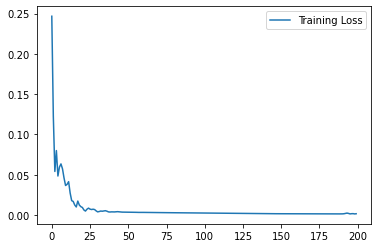

In [23]:
plt.plot(hist, label='Training Loss')
plt.legend()
plt.show()

In [24]:
y_train_pred = model(X_train)
y_test_pred = model(X_test)

y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test.detach().numpy())

trainScore = np.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 2.21 RMSE
Test Score: 2.09 RMSE


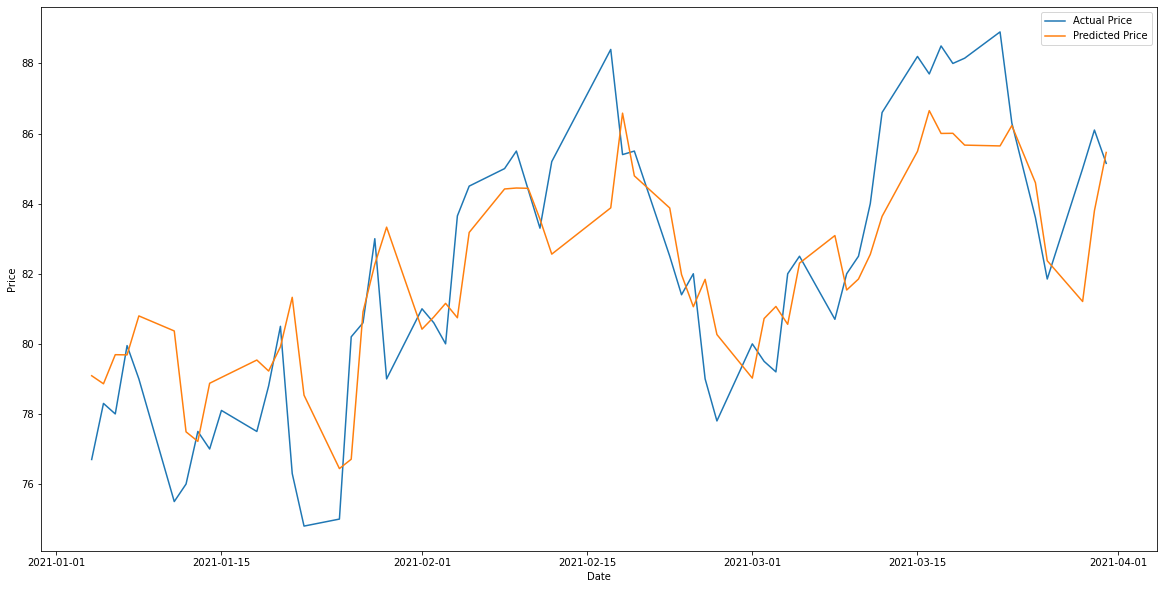

In [45]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], y_test, label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred, label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

The price predictions are pretty close to the actual price points, lets make some bollinger bands and see if we can make a profit using our predicted prices.

In [32]:
## create bollinger bands using a 15 day SMA

boll_daily = PAMP[['Date']]

price = np.array(training_data['Price'])
price = np.append(price, y_test_pred.reshape(-1))

boll_daily['Price'] = price
boll_daily['SMA'] = sma(boll_daily['Price'], 15)
boll_daily['upper_bb'], boll_daily['lower_bb'] = bollinger(boll_daily['Price'], boll_daily['SMA'], 15)
boll_daily

C:\Users\Chris\AppData\Local\Temp/ipykernel_1104/430973193.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_daily['Price'] = price
C:\Users\Chris\AppData\Local\Temp/ipykernel_1104/430973193.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_daily['SMA'] = sma(boll_daily['Price'], 15)
C:\Users\Chris\AppData\Local\Temp/ipykernel_1104/430973193.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,Date,Price,SMA,upper_bb,lower_bb
0,2020-01-02,48.250000,NaN,NaN,NaN
1,2020-01-03,48.800000,NaN,NaN,NaN
2,2020-01-06,48.500000,NaN,NaN,NaN
3,2020-01-07,47.600000,NaN,NaN,NaN
4,2020-01-08,46.500000,NaN,NaN,NaN
...,...,...,...,...,...
295,2021-03-25,84.596008,84.121152,88.135316,80.106987
296,2021-03-26,82.371498,84.242087,87.888587,80.595588
297,2021-03-29,81.208305,84.169164,88.019955,80.318373
298,2021-03-30,83.798119,84.216440,88.027605,80.405274


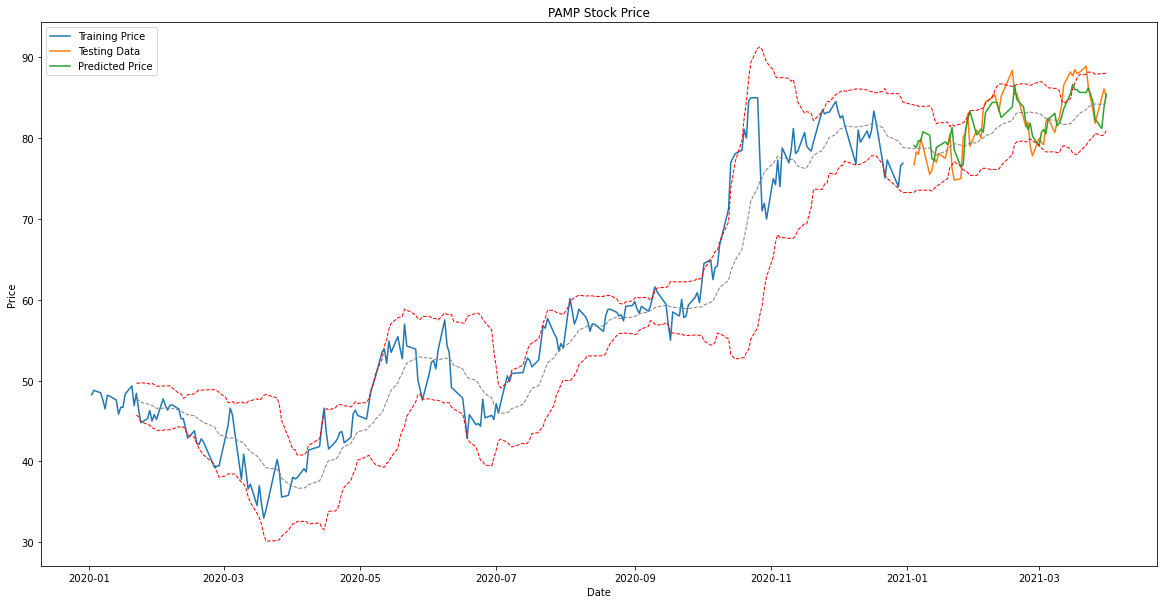

In [33]:
plt.figure(figsize=(20, 10))

plt.plot(training_data['Date'], training_data['Price'], label='Training Price')
plt.plot(testing_data['Date'], testing_data['Price'], label='Testing Data')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.plot(boll_daily['Date'], boll_daily['upper_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_daily['Date'], boll_daily['lower_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_daily['Date'], boll_daily['SMA'], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('PAMP Stock Price')
plt.legend()
plt.show()

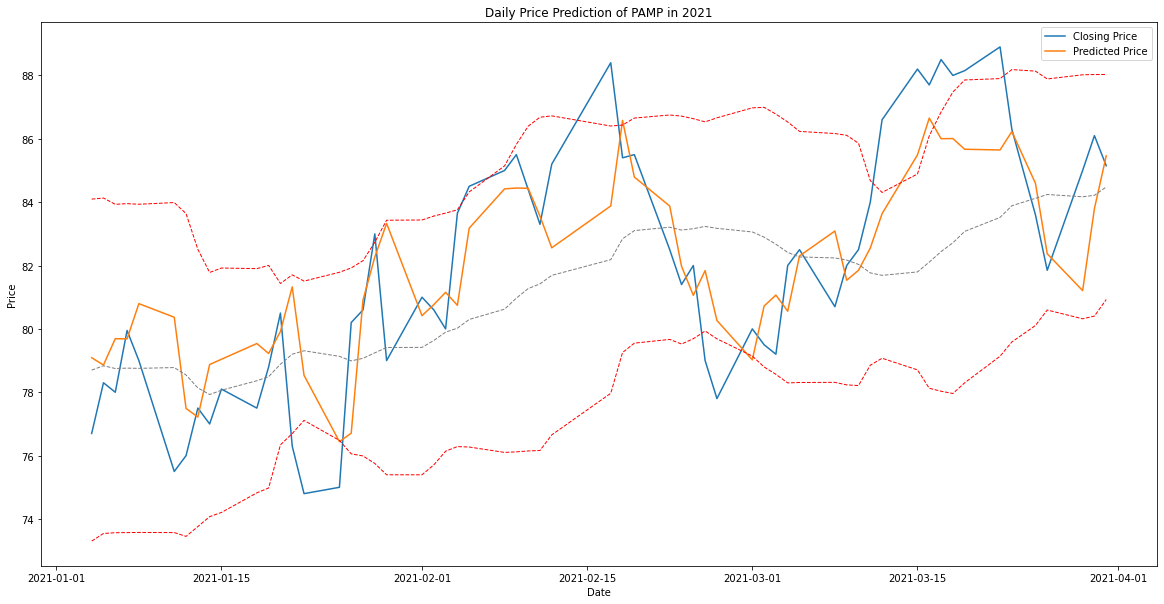

In [34]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], testing_data['Price'], label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.plot(boll_daily['Date'][240:], boll_daily['upper_bb'][240:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_daily['Date'][240:], boll_daily['lower_bb'][240:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_daily['Date'][240:], boll_daily['SMA'][240:], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Daily Price Prediction of PAMP in 2021')
plt.legend()
plt.show()

We can use bollinger bands to find buy and sell indicators for our stock. We buy when the price hits the lower band and sell when the price hits the upper band. Taking a look at this graph we can see that there are two buy indicators and 3-4 sell indicators. Let's find out the specific dates/prices for these indicators and see if we can turn a profit.

In [46]:
i_df = boll_daily[boll_daily['Date'] > '2021-01-01']
i_df['Actual_Price'] = testing_data['Price']
i_df

C:\Users\Chris\AppData\Local\Temp/ipykernel_1104/2526091140.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i_df['Actual_Price'] = testing_data['Price']


,Date,Price,SMA,upper_bb,lower_bb,Actual_Price
240,2021-01-04,79.089699,78.699313,84.096055,73.302572,76.70
241,2021-01-05,78.860306,78.836667,84.130124,73.543210,78.30
242,2021-01-06,79.690353,78.749357,83.931933,73.566781,78.00
243,2021-01-07,79.685059,78.761694,83.952803,73.570586,79.95
244,2021-01-08,80.796837,78.754817,83.934043,73.575590,79.00
245,2021-01-11,80.367699,78.779330,83.987216,73.571445,75.50
246,2021-01-12,77.488808,78.545251,83.639769,73.450732,76.00
247,2021-01-13,77.217789,78.136437,82.511986,73.760887,77.50
248,2021-01-14,78.874916,77.928098,81.781711,74.074484,77.00
249,2021-01-15,79.041405,78.064191,81.921520,74.206863,78.10


In [48]:
## find buying indicators

i_df[i_df['lower_bb'] >= i_df['Price']]

,Date,Price,SMA,upper_bb,lower_bb,Actual_Price
255,2021-01-25,76.441063,79.133679,81.786598,76.480760,75.0
278,2021-03-01,79.022263,83.059484,86.976645,79.142324,80.0


In [49]:
## find selling indicators

i_df[i_df['upper_bb'] <= i_df['Price']]

,Date,Price,SMA,upper_bb,lower_bb,Actual_Price
271,2021-02-18,86.581909,82.843550,86.433024,79.254075,85.4
288,2021-03-15,85.491158,81.797614,84.889057,78.706171,88.2
289,2021-03-16,86.653549,82.109405,86.092921,78.125889,87.7


The first buy indicator is on 01-25-2021 and the actual price of the stock is \\$75. The first sell indicator is on 02-18-2021 and the actual price of the stock is \\$85.40. This results in a 13.9% profit.

The second buy indicator is on 03-01-2021 with a stock price of \\$80. There are two sell indicators close by each other so if we did not know the actual price, I would use the second sell indicator on 03-16-2021 which had a stock price of \\$87.70. Although the stock price on 03-15-2021 is higher, I would still make a 9.6% profit using the second sell indicator.

Using the bollinger bands on the daily predictions, I would make a 25% profit on my investment in PAMP.

## Weekly

In [100]:
model = LSTM(input_dim=1, hidden_dim=50, output_dim=5, num_layers=2)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

print(model)

LSTM(
  (lstm): LSTM(1, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=5, bias=True)
)


In [14]:
X_train_w, y_train_w = get_weekly_train_data(scaled_train_data, 15)
X_test_w, y_test_w = get_weekly_test_data(PAMP, testing_data, scaler, 15)

In [102]:
X_train_w = torch.from_numpy(X_train_w).type(torch.Tensor)
X_test_w = torch.from_numpy(X_test_w).type(torch.Tensor)
y_train_w = torch.from_numpy(y_train_w).type(torch.Tensor)
y_test_w = torch.from_numpy(y_test_w).type(torch.Tensor)

In [103]:
num_epochs = 200

hist = np.zeros(num_epochs)
lstm = []
for t in range(num_epochs):
    y_train_pred = model(X_train_w)    
    
    loss = criterion(y_train_pred, y_train_w)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()    
    
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

Epoch  0 MSE:  0.27767398953437805
Epoch  1 MSE:  0.19490693509578705
Epoch  2 MSE:  0.10947112739086151
Epoch  3 MSE:  0.09764626622200012
Epoch  4 MSE:  0.05609485134482384
Epoch  5 MSE:  0.057564862072467804
Epoch  6 MSE:  0.06216110661625862
Epoch  7 MSE:  0.059851549565792084
Epoch  8 MSE:  0.05524953454732895
Epoch  9 MSE:  0.052484240382909775
Epoch  10 MSE:  0.04953697323799133
Epoch  11 MSE:  0.042906876653432846
Epoch  12 MSE:  0.03495023772120476
Epoch  13 MSE:  0.028396008536219597
Epoch  14 MSE:  0.021176466718316078
Epoch  15 MSE:  0.012526464648544788
Epoch  16 MSE:  0.011513839475810528
Epoch  17 MSE:  0.014170466922223568
Epoch  18 MSE:  0.017041373997926712
Epoch  19 MSE:  0.012206963263452053
Epoch  20 MSE:  0.0095243901014328
Epoch  21 MSE:  0.00817933864891529
Epoch  22 MSE:  0.00952831283211708
Epoch  23 MSE:  0.01023817341774702
Epoch  24 MSE:  0.009979899041354656
Epoch  25 MSE:  0.00970353651791811
Epoch  26 MSE:  0.008791595697402954
Epoch  27 MSE:  0.00737153

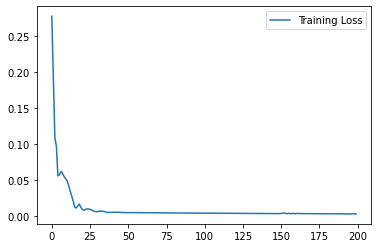

In [104]:
plt.plot(hist, label='Training Loss')
plt.legend()
plt.show()

In [105]:
y_train_pred = model(X_train_w)
y_test_pred = model(X_test_w)

y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train_w.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test_w.reshape(12, 5).detach().numpy())

trainScore = np.sqrt(mean_squared_error(y_train_w[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(y_test_w[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 57.25 RMSE
Test Score: 77.93 RMSE


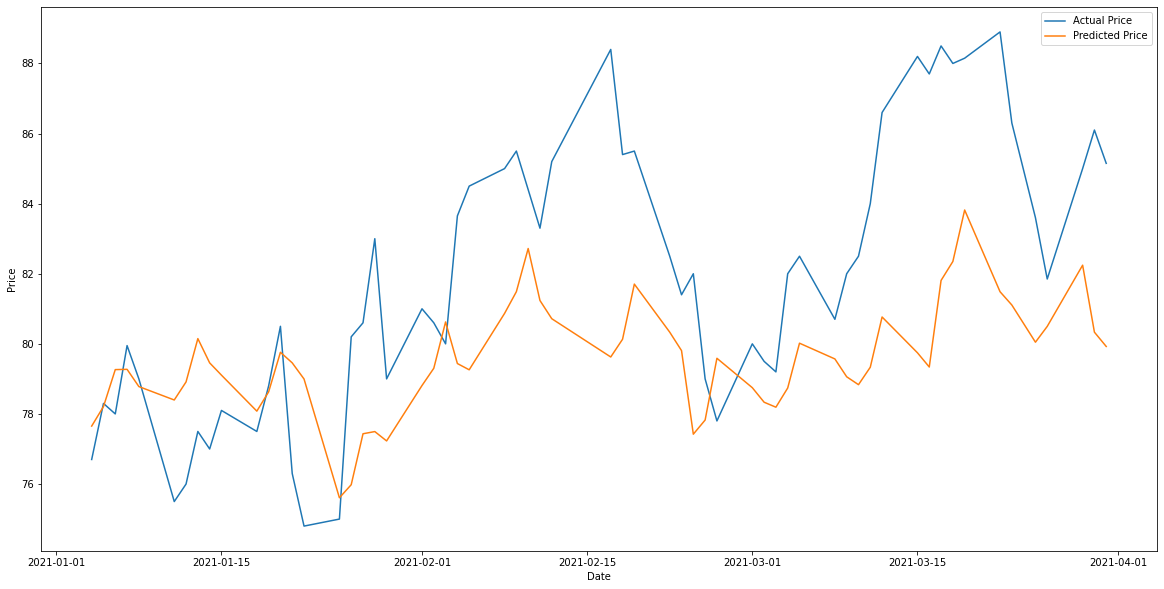

In [110]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], y_test.reshape(-1), label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

The weekly price predictions are not very accurate when compared to the actual price of the stock. Let's see if we can still turn a profit using bollinger bands on the weekly predicted prices.

In [111]:
boll_weekly = PAMP[['Date']]

price = np.array(training_data['Price'])
price = np.append(price, y_test_pred.reshape(-1))

boll_weekly['Price'] = price
boll_weekly['SMA'] = sma(boll_weekly['Price'], 15)
boll_weekly['upper_bb'], boll_weekly['lower_bb'] = bollinger(boll_weekly['Price'], boll_weekly['SMA'], 15)
boll_weekly

C:\Users\Chris\AppData\Local\Temp/ipykernel_1104/2209495611.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_weekly['Price'] = price
C:\Users\Chris\AppData\Local\Temp/ipykernel_1104/2209495611.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_weekly['SMA'] = sma(boll_weekly['Price'], 15)
C:\Users\Chris\AppData\Local\Temp/ipykernel_1104/2209495611.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

,Date,Price,SMA,upper_bb,lower_bb
0,2020-01-02,48.250000,NaN,NaN,NaN
1,2020-01-03,48.800000,NaN,NaN,NaN
2,2020-01-06,48.500000,NaN,NaN,NaN
3,2020-01-07,47.600000,NaN,NaN,NaN
4,2020-01-08,46.500000,NaN,NaN,NaN
...,...,...,...,...,...
295,2021-03-25,80.047050,80.401531,83.326522,77.476541
296,2021-03-26,80.497864,80.518740,83.295487,77.741992
297,2021-03-29,82.244301,80.667129,83.564573,77.769685
298,2021-03-30,80.332458,80.718007,83.559086,77.876929


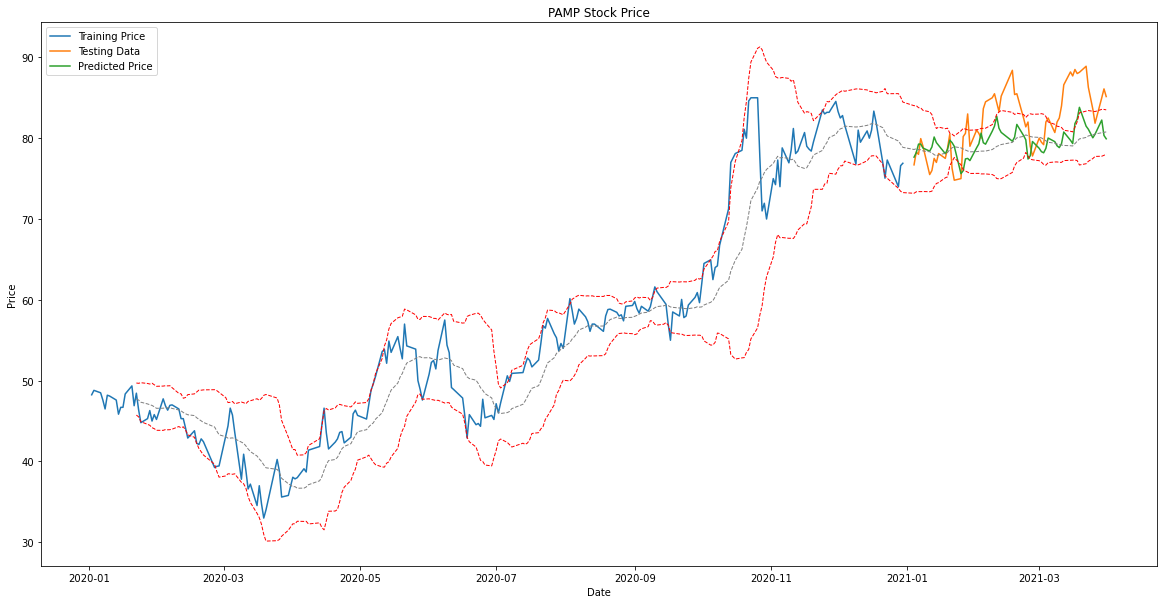

In [112]:
plt.figure(figsize=(20, 10))

plt.plot(training_data['Date'], training_data['Price'], label='Training Price')
plt.plot(testing_data['Date'], testing_data['Price'], label='Testing Data')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.plot(boll_weekly['Date'], boll_weekly['upper_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_weekly['Date'], boll_weekly['lower_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_weekly['Date'], boll_weekly['SMA'], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('PAMP Stock Price')
plt.legend()
plt.show()

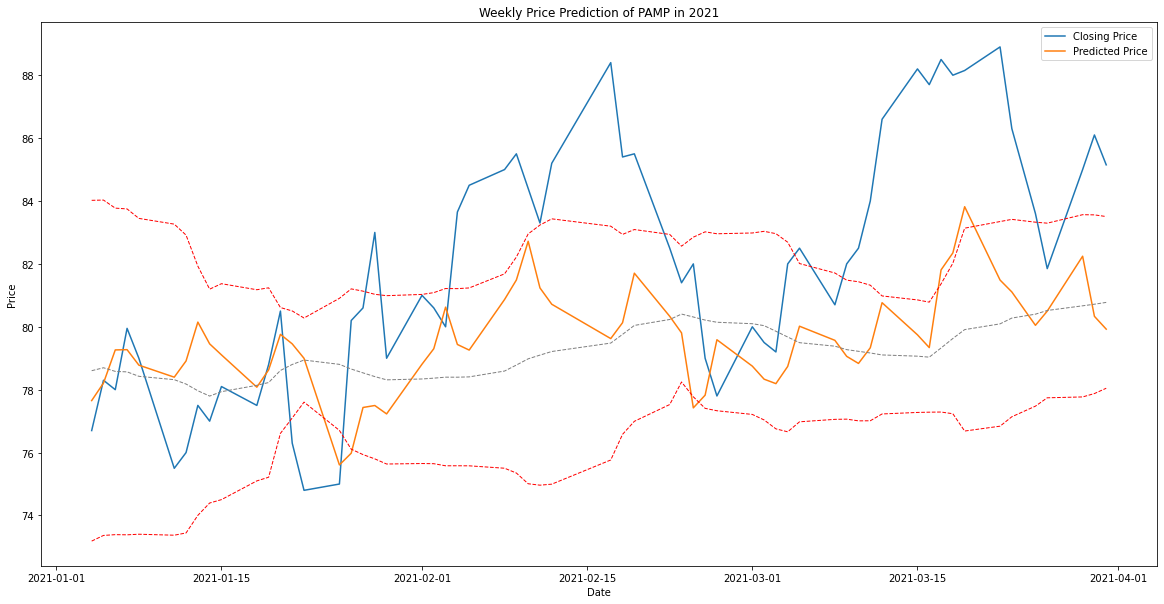

In [113]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], testing_data['Price'], label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.plot(boll_weekly['Date'][240:], boll_weekly['upper_bb'][240:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_weekly['Date'][240:], boll_weekly['lower_bb'][240:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_weekly['Date'][240:], boll_weekly['SMA'][240:], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Weekly Price Prediction of PAMP in 2021')
plt.legend()
plt.show()

Looks like there are 4 buy indicators and 2-3 sell indicators using our weekly data. Let's see if we can turn a profit using those indicators.

In [114]:
i_df = boll_weekly[boll_weekly['Date'] > '2021-01-01']
i_df['Actual_Price'] = testing_data['Price']
i_df

C:\Users\Chris\AppData\Local\Temp/ipykernel_1104/1562068346.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i_df['Actual_Price'] = testing_data['Price']


,Date,Price,SMA,upper_bb,lower_bb,Actual_Price
240,2021-01-04,77.653481,78.603565,84.021544,73.185587,76.70
241,2021-01-05,78.210075,78.697570,84.029687,73.365454,78.30
242,2021-01-06,79.264580,78.581876,83.773343,73.390408,78.00
243,2021-01-07,79.272766,78.566727,83.748029,73.385425,79.95
244,2021-01-08,78.780785,78.425446,83.447195,73.403697,79.00
245,2021-01-11,78.397926,78.318641,83.264441,73.372841,75.50
246,2021-01-12,78.913506,78.179541,82.915038,73.444045,76.00
247,2021-01-13,80.149101,77.966148,81.928460,74.003836,77.50
248,2021-01-14,79.457153,77.796625,81.197036,74.396214,77.00
249,2021-01-15,79.106972,77.937090,81.370381,74.503798,78.10


In [115]:
## find buying indicators

i_df[i_df['lower_bb'] >= i_df['Price']]

,Date,Price,SMA,upper_bb,lower_bb,Actual_Price
255,2021-01-25,75.607529,78.805594,80.905814,76.705375,75.0
256,2021-01-26,75.980423,78.656951,81.205550,76.108351,80.2
275,2021-02-24,77.422272,80.311781,82.849932,77.773631,82.0


In [116]:
## find selling indicators

i_df[i_df['upper_bb'] <= i_df['Price']]

,Date,Price,SMA,upper_bb,lower_bb,Actual_Price
290,2021-03-17,81.808891,79.326873,81.364312,77.289434,88.50
291,2021-03-18,82.349739,79.628461,82.021879,77.235042,88.00
292,2021-03-19,83.818413,79.910478,83.135853,76.685104,88.15


I'll use the first buying indicator on 01-25-2021 with a closing price of \\$75. For the first selling indicator I will use, the bollinger band doesn't quite touch the price but it gets really close and it is on 02-10-2021 with a closing price of \\$84.40. This results in a 12.5% profit. 

The second buying indicator is on 02-24-2021 with a closing price of \\$82. The second selling indicator I will use is the last selling indicator on 03-19-2021 with a closing price of \\$88.15. This results in a 7.5% profit.

Using bollinger bands on the weekly data, I would make a 21% profit on my investment. Even though the weekly predictions were not very accurate I was still able to turn a decent profit.

# Monthly

In [132]:
model = LSTM(input_dim=1, hidden_dim=50, output_dim=20, num_layers=2)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

print(model)

LSTM(
  (lstm): LSTM(1, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=20, bias=True)
)


In [133]:
X_train_m, y_train_m = get_monthly_train_data(scaled_train_data, 40)
X_test_m, y_test_m = get_monthly_test_data(PAMP, testing_data, scaler, 40)

In [134]:
X_train_m = torch.from_numpy(X_train_m).type(torch.Tensor)
X_test_m = torch.from_numpy(X_test_m).type(torch.Tensor)
y_train_m = torch.from_numpy(y_train_m).type(torch.Tensor)
y_test_m = torch.from_numpy(y_test_m).type(torch.Tensor)

In [135]:
num_epochs = 200

hist = np.zeros(num_epochs)
lstm = []
for t in range(num_epochs):
    y_train_pred = model(X_train_m)    
    
    loss = criterion(y_train_pred, y_train_m)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()    
    
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

Epoch  0 MSE:  0.24070745706558228
Epoch  1 MSE:  0.1707436591386795
Epoch  2 MSE:  0.08227402716875076
Epoch  3 MSE:  0.21674536168575287
Epoch  4 MSE:  0.08392203599214554
Epoch  5 MSE:  0.06448061764240265
Epoch  6 MSE:  0.08204385638237
Epoch  7 MSE:  0.08679419755935669
Epoch  8 MSE:  0.08322332054376602
Epoch  9 MSE:  0.07750088721513748
Epoch  10 MSE:  0.07259911298751831
Epoch  11 MSE:  0.06939509510993958
Epoch  12 MSE:  0.0677076131105423
Epoch  13 MSE:  0.06675440073013306
Epoch  14 MSE:  0.06567848473787308
Epoch  15 MSE:  0.0642373189330101
Epoch  16 MSE:  0.06273141503334045
Epoch  17 MSE:  0.061570025980472565
Epoch  18 MSE:  0.06091391667723656
Epoch  19 MSE:  0.0605962835252285
Epoch  20 MSE:  0.06025667488574982
Epoch  21 MSE:  0.059506822377443314
Epoch  22 MSE:  0.05801277980208397
Epoch  23 MSE:  0.05549827963113785
Epoch  24 MSE:  0.051767557859420776
Epoch  25 MSE:  0.04674410820007324
Epoch  26 MSE:  0.0404403917491436
Epoch  27 MSE:  0.03189980983734131
Epoch  

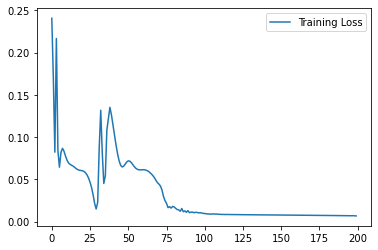

In [136]:
plt.plot(hist, label='Training Loss')
plt.legend()
plt.show()

In [137]:
y_train_pred = model(X_train_m)
y_test_pred = model(X_test_m)

y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train_m.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test_m.detach().numpy())

trainScore = np.sqrt(mean_squared_error(y_train_m[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(y_test_m[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 57.19 RMSE
Test Score: 75.12 RMSE


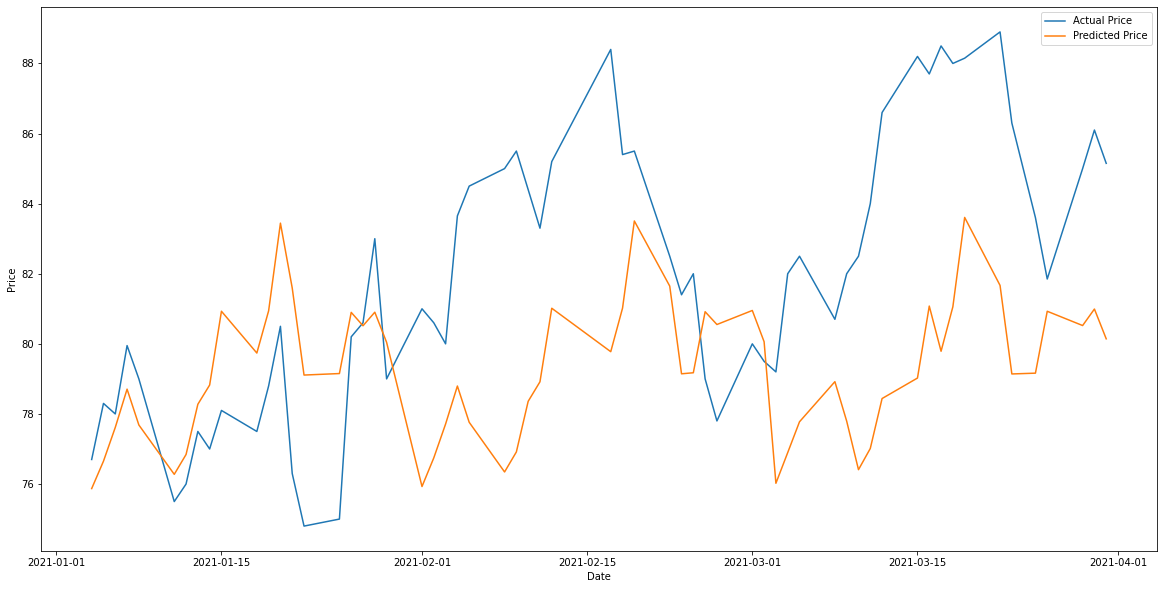

In [138]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], y_test.reshape(-1), label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

The monthly data, like the weekly data, is not very accurate with the price predictions. Let's see if we can turn a profit using bollinger bands on this data.

In [142]:
boll_monthly = PAMP[['Date']]

price = np.array(training_data['Price'])
price = np.append(price, y_test_pred.reshape(-1))

boll_monthly['Price'] = price
boll_monthly['SMA'] = sma(boll_monthly['Price'], 15)
boll_monthly['upper_bb'], boll_monthly['lower_bb'] = bollinger(boll_monthly['Price'], boll_monthly['SMA'], 15)
boll_monthly

C:\Users\Chris\AppData\Local\Temp/ipykernel_1104/3282755160.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_monthly['Price'] = price
C:\Users\Chris\AppData\Local\Temp/ipykernel_1104/3282755160.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_monthly['SMA'] = sma(boll_monthly['Price'], 15)
C:\Users\Chris\AppData\Local\Temp/ipykernel_1104/3282755160.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

,Date,Price,SMA,upper_bb,lower_bb
0,2020-01-02,48.250000,NaN,NaN,NaN
1,2020-01-03,48.800000,NaN,NaN,NaN
2,2020-01-06,48.500000,NaN,NaN,NaN
3,2020-01-07,47.600000,NaN,NaN,NaN
4,2020-01-08,46.500000,NaN,NaN,NaN
...,...,...,...,...,...
295,2021-03-25,79.163513,79.185029,83.163180,75.206878
296,2021-03-26,80.929337,79.453908,83.312446,75.595371
297,2021-03-29,80.522217,79.636989,83.414072,75.859906
298,2021-03-30,80.993195,79.775135,83.591365,75.958906


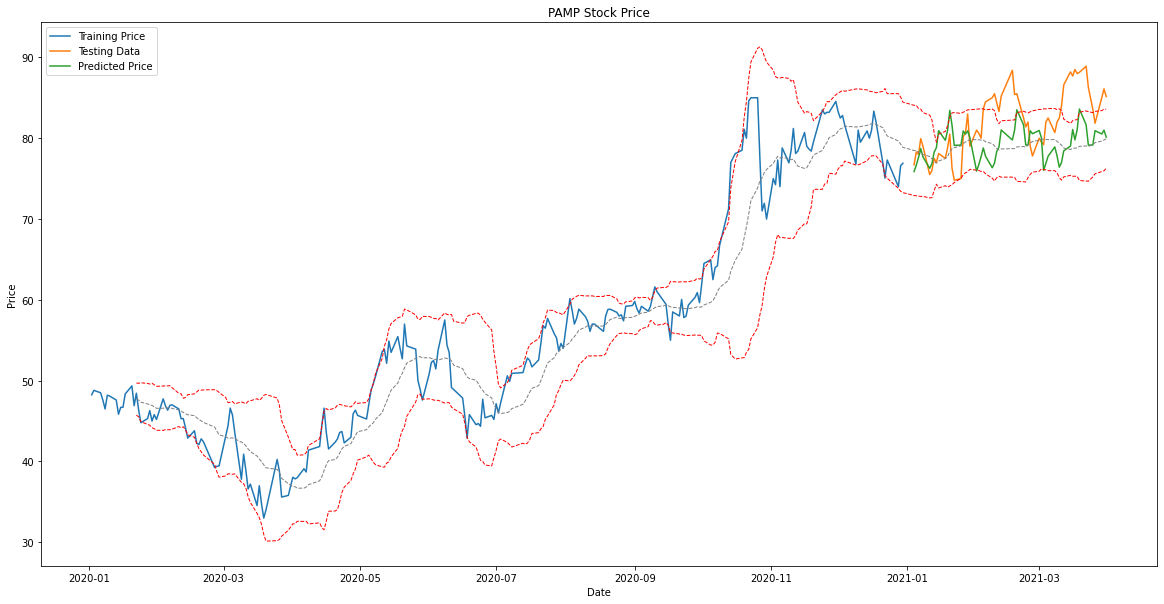

In [143]:
plt.figure(figsize=(20, 10))

plt.plot(training_data['Date'], training_data['Price'], label='Training Price')
plt.plot(testing_data['Date'], testing_data['Price'], label='Testing Data')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.plot(boll_monthly['Date'], boll_monthly['upper_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_monthly['Date'], boll_monthly['lower_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_monthly['Date'], boll_monthly['SMA'], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('PAMP Stock Price')
plt.legend()
plt.show()

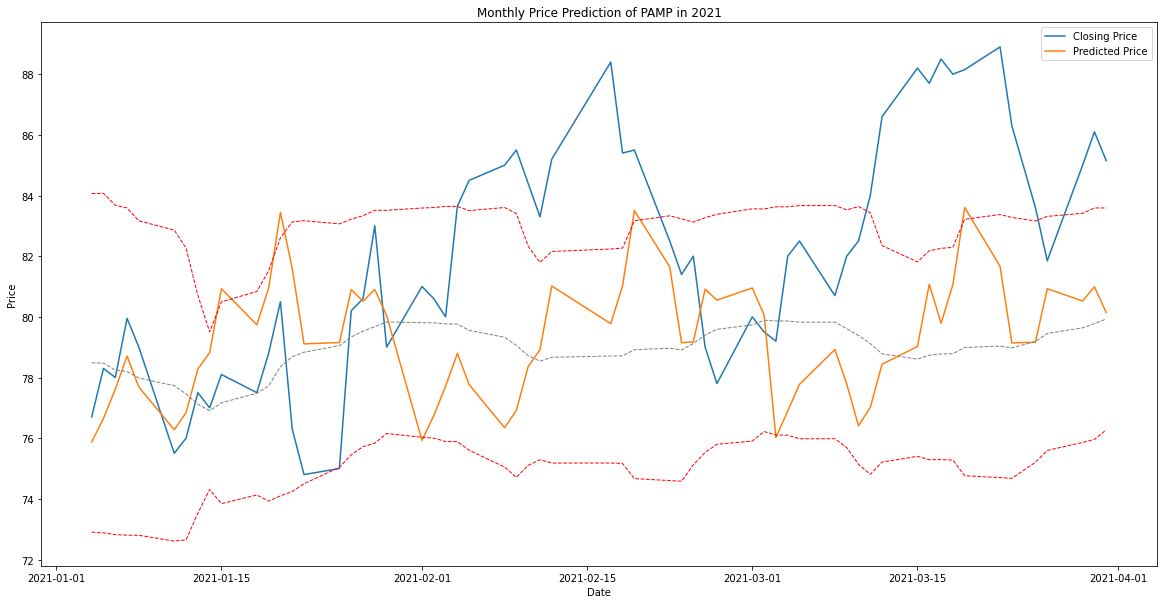

In [144]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], testing_data['Price'], label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.plot(boll_monthly['Date'][240:], boll_monthly['upper_bb'][240:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_monthly['Date'][240:], boll_monthly['lower_bb'][240:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_monthly['Date'][240:], boll_monthly['SMA'][240:], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Monthly Price Prediction of PAMP in 2021')
plt.legend()
plt.show()

Let's find out where the buy and sell indicators are and see if we can turn a profit using those signals.

In [145]:
i_df = boll_monthly[boll_monthly['Date'] > '2021-01-01']
i_df['Actual_Price'] = testing_data['Price']
i_df

C:\Users\Chris\AppData\Local\Temp/ipykernel_1104/3844387549.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i_df['Actual_Price'] = testing_data['Price']


,Date,Price,SMA,upper_bb,lower_bb,Actual_Price
240,2021-01-04,75.870377,78.484692,84.067738,72.901646,76.70
241,2021-01-05,76.652008,78.474826,84.071138,72.878513,78.30
242,2021-01-06,77.614899,78.249152,83.679609,72.818695,78.00
243,2021-01-07,78.707138,78.196295,83.589882,72.802707,79.95
244,2021-01-08,77.684486,77.981927,83.166530,72.797324,79.00
245,2021-01-11,76.276642,77.733703,82.860427,72.606980,75.50
246,2021-01-12,76.842903,77.456564,82.266205,72.646923,76.00
247,2021-01-13,78.275795,77.118283,80.711384,73.525182,77.50
248,2021-01-14,78.824753,76.906600,79.503028,74.310172,77.00
249,2021-01-15,80.929855,77.168590,80.495679,73.841502,78.10


In [146]:
## find buying indicators

i_df[i_df['lower_bb'] >= i_df['Price']]

,Date,Price,SMA,upper_bb,lower_bb,Actual_Price
260,2021-02-01,75.928848,79.809418,83.588011,76.030824,81.0
280,2021-03-03,76.021652,79.865305,83.626694,76.103917,79.2


In [147]:
## find selling indicators

i_df[i_df['upper_bb'] <= i_df['Price']]

,Date,Price,SMA,upper_bb,lower_bb,Actual_Price
249,2021-01-15,80.929855,77.168590,80.495679,73.841502,78.10
252,2021-01-20,83.443741,78.353574,82.608364,74.098783,80.50
272,2021-02-19,83.505562,78.916456,83.165776,74.667136,85.50
292,2021-03-19,83.606606,78.989174,83.216488,74.761859,88.15


The first buying indicator is on 02-01-2021 with a price of \\$81. The first two selling indicators are before our purchase, so we will use the next indicator on 02-19-2021 with a price of \\$85.50. This results in a 5.6% profit.

The second buying indicator is on 03-03-2021 with a price of \\$79.20. The next selling indicator is on 03-19-2021 with a price of \\$88.15. This results in a 11.3% profit.

Using the monthly data, I would make a 17.5% profit on my investment.

# Conclusion

Using price predictions with an LSTM model on PAMP, I was able to consistently make a profit using bollinger bands on the price predictions. The best performance was on the daily price predictions with a 25% profit. 

Even though the weekly and monthly predictions were not that accurate, I was still able to turn a profit using those price predictions as well. The weekly price predictions had a 21% profit while the monthly price predictions had a 17.5% profit.

I would recommend an investment strategy using the indicators given with the daily price predictions. Using this investment strategy leads to a profit of 25%.

# Appendix

# TensorFlow

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

## Daily

In [13]:
X_train, y_train = get_train_data(scaled_train_data, 10)
X_test, y_test = get_test_data(PAMP, testing_data, scaler, 10)

In [17]:
inputs = tf.keras.Input(shape=(X_train.shape[1], 1))
x = layers.LSTM(units=50, return_sequences=True)(inputs)
x = layers.Dropout(0.2)(x)
x = layers.LSTM(units=50)(x)
x = layers.Dropout(0.2)(x)
output = layers.Dense(1, activation='linear')(x)

model = tf.keras.Model(inputs=inputs, outputs=output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10, 1)]           0         
                                                                 
 lstm (LSTM)                 (None, 10, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 10, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 30,651
Trainable params: 30,651
Non-trainable p

In [18]:
model.compile(loss='mean_squared_error', 
              optimizer=tf.keras.optimizers.Adam(lr=.01, decay=0.01))

history = model.fit(X_train, y_train, epochs=200)

Epoch 1/200


C:\Users\Chris\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


8/8 [==============================] - 3s 9ms/step - loss: 0.1112
Epoch 2/200
8/8 [==============================] - 0s 8ms/step - loss: 0.0379
Epoch 3/200
8/8 [==============================] - 0s 8ms/step - loss: 0.0176
Epoch 4/200
8/8 [==============================] - 0s 8ms/step - loss: 0.0100
Epoch 5/200
8/8 [==============================] - 0s 8ms/step - loss: 0.0075
Epoch 6/200
8/8 [==============================] - 0s 8ms/step - loss: 0.0057
Epoch 7/200
8/8 [==============================] - 0s 8ms/step - loss: 0.0064
Epoch 8/200
8/8 [==============================] - 0s 9ms/step - loss: 0.0063
Epoch 9/200
8/8 [==============================] - 0s 8ms/step - loss: 0.0054
Epoch 10/200
8/8 [==============================] - 0s 9ms/step - loss: 0.0076
Epoch 11/200
8/8 [==============================] - 0s 8ms/step - loss: 0.0073
Epoch 12/200
8/8 [==============================] - 0s 8ms/step - loss: 0.0058
Epoch 13/200
8/8 [==============================] - 0s 8ms/step - loss: 0

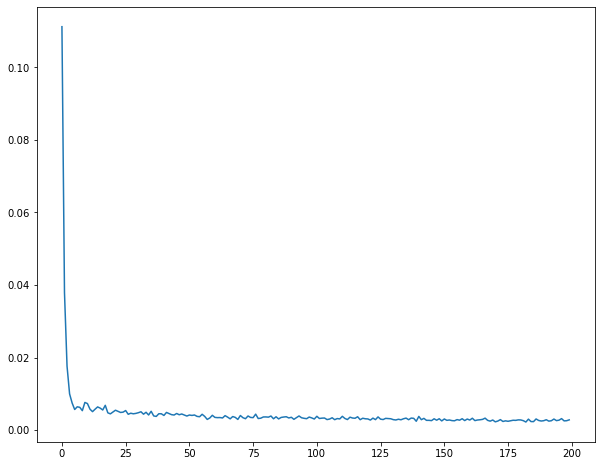

In [19]:
plt.figure(figsize=(10, 8))
plt.plot(history.history['loss'], label='training loss')

In [22]:
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
testing_data['Predicted_Price'] = pred_price

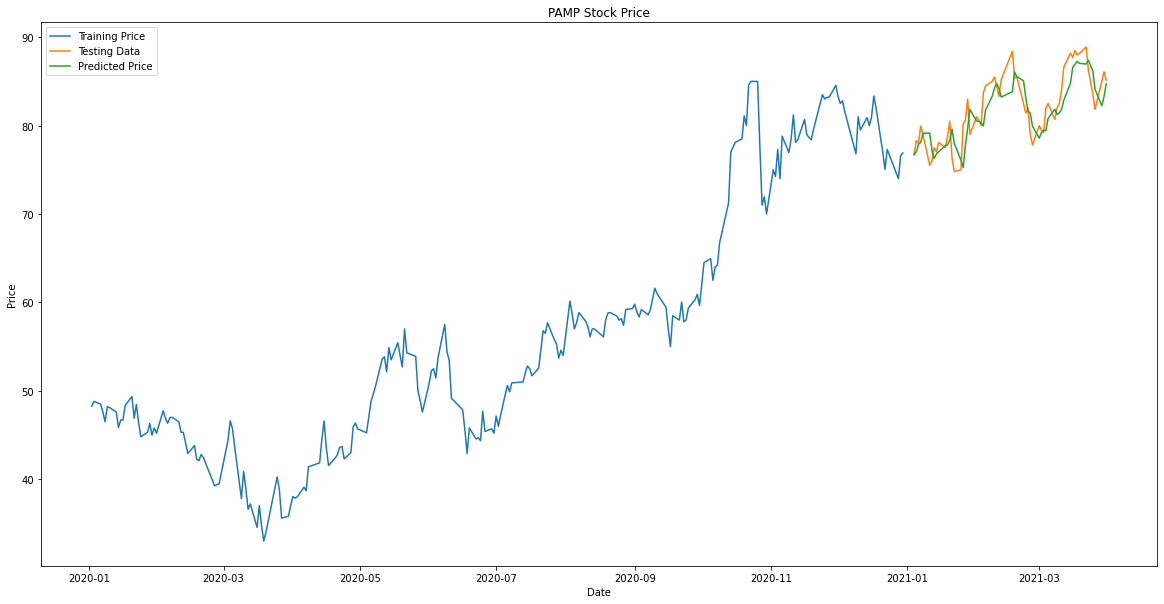

In [23]:
plt.figure(figsize=(20, 10))

plt.plot(training_data['Date'], training_data['Price'], label='Training Price')
plt.plot(testing_data['Date'], testing_data['Price'], label='Testing Data')
plt.plot(testing_data['Date'], testing_data['Predicted_Price'], label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('PAMP Stock Price')
plt.legend()
plt.show()

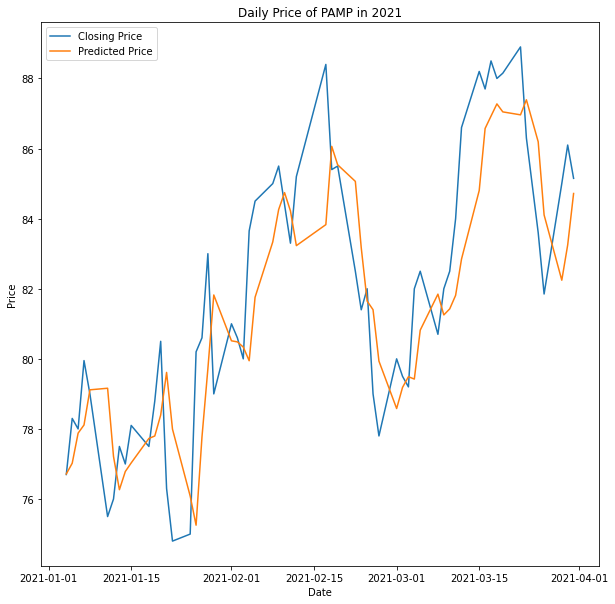

In [24]:
plt.figure(figsize=(10, 10))
plt.plot(testing_data['Date'], testing_data['Price'], label='Closing Price')
plt.plot(testing_data['Date'], testing_data['Predicted_Price'], label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Daily Price of PAMP in 2021')
plt.legend()
plt.show()

In [36]:
boll_df = PAMP[['Date']]
boll_df['Price'] = training_data['Price']
boll_df['Price'][240:] = testing_data['Predicted_Price']

C:\Users\Chris\AppData\Local\Temp/ipykernel_11604/570996053.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_df['Price'] = training_data['Price']
C:\Users\Chris\AppData\Local\Temp/ipykernel_11604/570996053.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_df['Price'][240:] = testing_data['Predicted_Price']
C:\Users\Chris\anaconda3\lib\site-packages\pandas\core\series.py:1105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [40]:
boll_df['SMA'] = sma(boll_df['Price'], 20)
boll_df['upper_bb'], boll_df['lower_bb'] = bollinger(boll_df['Price'], boll_df['SMA'], 20)
boll_df

C:\Users\Chris\AppData\Local\Temp/ipykernel_11604/4042872622.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_df['SMA'] = sma(boll_df['Price'], 20)
C:\Users\Chris\AppData\Local\Temp/ipykernel_11604/4042872622.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_df['upper_bb'], boll_df['lower_bb'] = bollinger(boll_df['Price'], boll_df['SMA'], 20)


,Date,Price,SMA,upper_bb,lower_bb
0,2020-01-02,48.250000,NaN,NaN,NaN
1,2020-01-03,48.800000,NaN,NaN,NaN
2,2020-01-06,48.500000,NaN,NaN,NaN
3,2020-01-07,47.600000,NaN,NaN,NaN
4,2020-01-08,46.500000,NaN,NaN,NaN
...,...,...,...,...,...
295,2021-03-25,86.193428,83.059274,89.472542,76.646006
296,2021-03-26,84.105873,83.194484,89.574545,76.814423
297,2021-03-29,82.243782,83.309915,89.523038,77.096792
298,2021-03-30,83.249397,83.543279,89.345752,77.740805


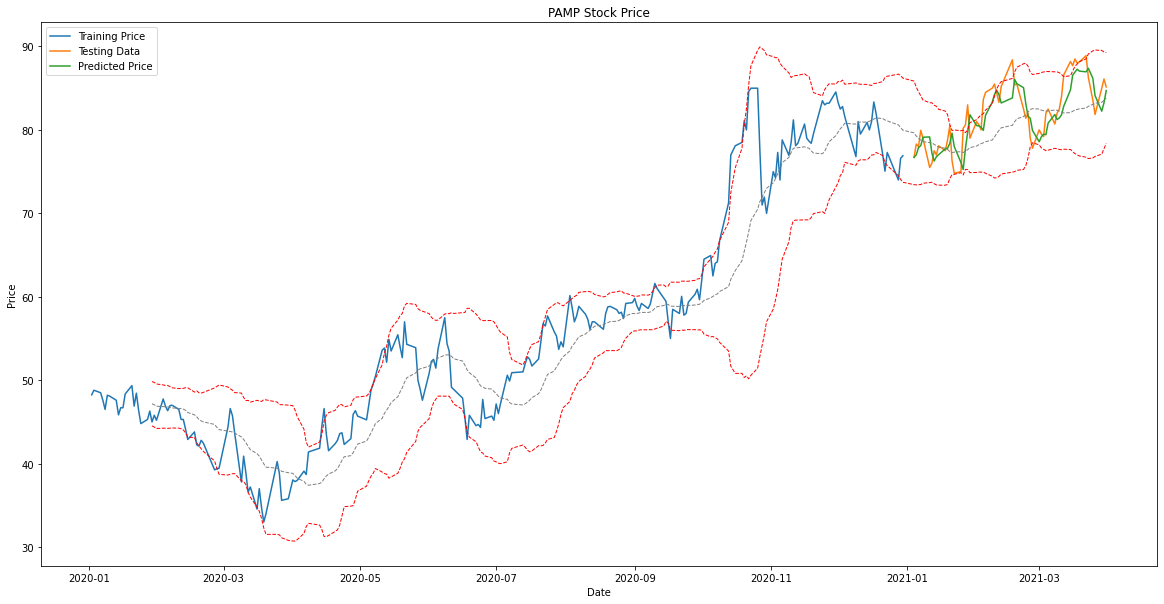

In [41]:
plt.figure(figsize=(20, 10))

plt.plot(training_data['Date'], training_data['Price'], label='Training Price')
plt.plot(testing_data['Date'], testing_data['Price'], label='Testing Data')
plt.plot(testing_data['Date'], testing_data['Predicted_Price'], label='Predicted Price')
plt.plot(boll_df['Date'], boll_df['upper_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_df['Date'], boll_df['lower_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_df['Date'], boll_df['SMA'], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('PAMP Stock Price')
plt.legend()
plt.show()

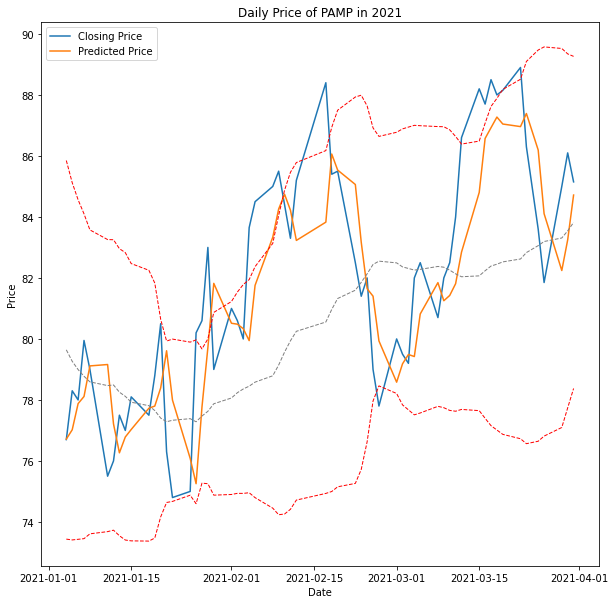

In [42]:
plt.figure(figsize=(10, 10))
plt.plot(testing_data['Date'], testing_data['Price'], label='Closing Price')
plt.plot(testing_data['Date'], testing_data['Predicted_Price'], label='Predicted Price')
plt.plot(boll_df['Date'][240:], boll_df['upper_bb'][240:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_df['Date'][240:], boll_df['lower_bb'][240:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_df['Date'][240:], boll_df['SMA'][240:], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Daily Price of PAMP in 2021')
plt.legend()
plt.show()

## Weekly

In [44]:
X_train_w, y_train_w = get_weekly_train_data(scaled_train_data, 10)
X_test_w, y_test_w = get_weekly_test_data(PAMP, testing_data, scaler, 10)

In [45]:
inputs = tf.keras.Input(shape=(X_train_w.shape[1], 1))
x = layers.LSTM(units=50, return_sequences=True)(inputs)
x = layers.Dropout(0.2)(x)
x = layers.LSTM(units=50)(x)
x = layers.Dropout(0.2)(x)
output = layers.Dense(5, activation='linear')(x)

model = tf.keras.Model(inputs=inputs, outputs=output)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 10, 1)]           0         
                                                                 
 lstm_2 (LSTM)               (None, 10, 50)            10400     
                                                                 
 dropout_2 (Dropout)         (None, 10, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_3 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 5)                 255       
                                                                 
Total params: 30,855
Trainable params: 30,855
Non-trainable

In [46]:
model.compile(loss='mean_squared_error', 
              optimizer=tf.keras.optimizers.Adam(lr=.01, decay=0.01))

history = model.fit(X_train_w, y_train_w, epochs=200)

Epoch 1/200


C:\Users\Chris\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 3s 10ms/step - loss: 0.2183
Epoch 2/200
2/2 [==============================] - 0s 10ms/step - loss: 0.0324
Epoch 3/200
2/2 [==============================] - 0s 11ms/step - loss: 0.0312
Epoch 4/200
2/2 [==============================] - 0s 11ms/step - loss: 0.0341
Epoch 5/200
2/2 [==============================] - 0s 10ms/step - loss: 0.0325
Epoch 6/200
2/2 [==============================] - 0s 9ms/step - loss: 0.0161
Epoch 7/200
2/2 [==============================] - 0s 9ms/step - loss: 0.0194
Epoch 8/200
2/2 [==============================] - 0s 9ms/step - loss: 0.0147
Epoch 9/200
2/2 [==============================] - 0s 10ms/step - loss: 0.0163
Epoch 10/200
2/2 [==============================] - 0s 10ms/step - loss: 0.0108
Epoch 11/200
2/2 [==============================] - 0s 9ms/step - loss: 0.0147
Epoch 12/200
2/2 [==============================] - 0s 9ms/step - loss: 0.0126
Epoch 13/200
2/2 [==============================] - 0s 9ms/step - 

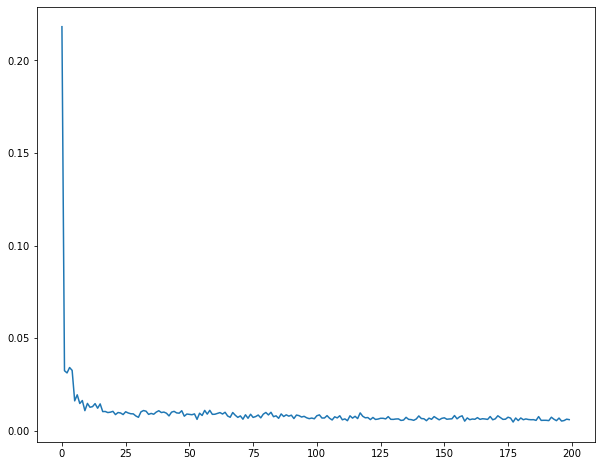

In [47]:
plt.figure(figsize=(10, 8))
plt.plot(history.history['loss'], label='training loss')

In [50]:
pred_price = model.predict(X_test_w)
pred_price = scaler.inverse_transform(pred_price)

train_pred_price = model.predict(X_train_w)
train_pred_price = scaler.inverse_transform(train_pred_price)

In [51]:
trainScore = np.sqrt(mean_squared_error(scaler.inverse_transform(y_train_w[:,:]), train_pred_price))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(scaler.inverse_transform(y_test_w[:,:]), pred_price))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 3.85 RMSE
Test Score: 2.89 RMSE


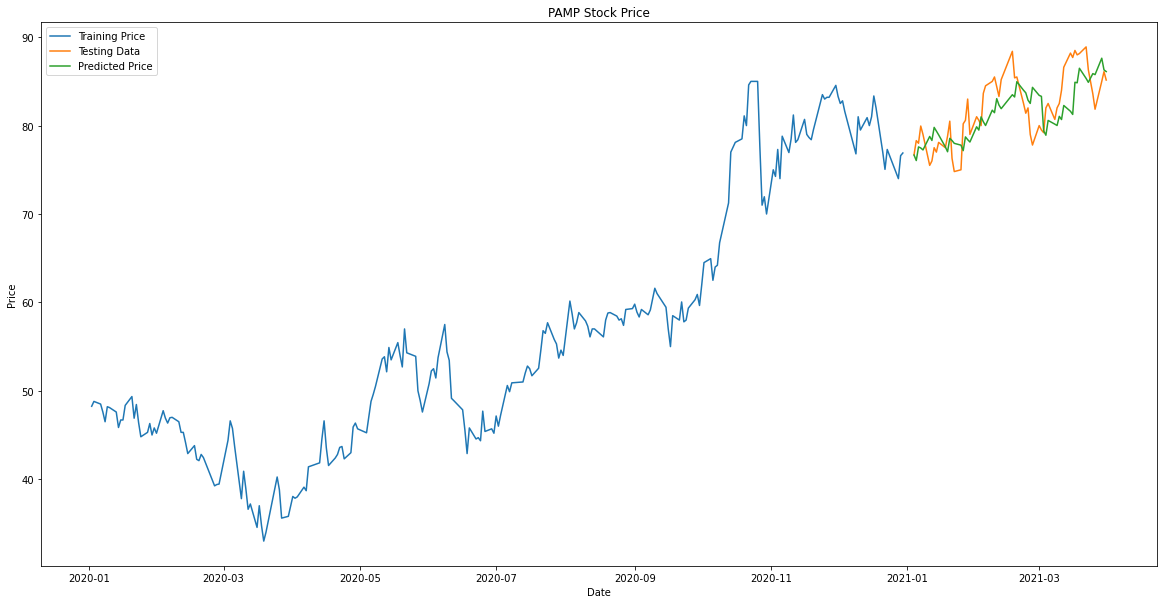

In [52]:
plt.figure(figsize=(20, 10))

plt.plot(training_data['Date'], training_data['Price'], label='Training Price')
plt.plot(testing_data['Date'], testing_data['Price'], label='Testing Data')
plt.plot(testing_data['Date'], pred_price.flatten(), label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('PAMP Stock Price')
plt.legend()
plt.show()

# Monthly

In [84]:
X_train_m, y_train_m = get_monthly_train_data(scaled_train_data, 40)
X_test_m, y_test_m = get_monthly_test_data(PAMP, testing_data, scaler, 40)

In [99]:
inputs = tf.keras.Input(shape=(X_train_m.shape[1], 1))
x = layers.LSTM(units=50, return_sequences=True)(inputs)
x = layers.Dropout(0.2)(x)
x = layers.LSTM(units=50)(x)
x = layers.Dropout(0.2)(x)
output = layers.Dense(20, activation='linear')(x)

model = tf.keras.Model(inputs=inputs, outputs=output)
model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 40, 1)]           0         
                                                                 
 lstm_14 (LSTM)              (None, 40, 50)            10400     
                                                                 
 dropout_14 (Dropout)        (None, 40, 50)            0         
                                                                 
 lstm_15 (LSTM)              (None, 50)                20200     
                                                                 
 dropout_15 (Dropout)        (None, 50)                0         
                                                                 
 dense_7 (Dense)             (None, 20)                1020      
                                                                 
Total params: 31,620
Trainable params: 31,620
Non-trainable

In [100]:
model.compile(loss='mean_squared_error', 
              optimizer=tf.keras.optimizers.Adam(lr=.01, decay=0.01))

history = model.fit(X_train_m, y_train_m, epochs=200)

Epoch 1/200


C:\Users\Chris\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 3s 3s/step - loss: 0.2559
Epoch 2/200
1/1 [==============================] - 0s 29ms/step - loss: 0.1669
Epoch 3/200
1/1 [==============================] - 0s 27ms/step - loss: 0.1080
Epoch 4/200
1/1 [==============================] - 0s 21ms/step - loss: 0.0457
Epoch 5/200
1/1 [==============================] - 0s 22ms/step - loss: 0.0534
Epoch 6/200
1/1 [==============================] - 0s 21ms/step - loss: 0.0414
Epoch 7/200
1/1 [==============================] - 0s 22ms/step - loss: 0.0487
Epoch 8/200
1/1 [==============================] - 0s 21ms/step - loss: 0.0406
Epoch 9/200
1/1 [==============================] - 0s 22ms/step - loss: 0.0373
Epoch 10/200
1/1 [==============================] - 0s 21ms/step - loss: 0.0290
Epoch 11/200
1/1 [==============================] - 0s 22ms/step - loss: 0.0267
Epoch 12/200
1/1 [==============================] - 0s 23ms/step - loss: 0.0254
Epoch 13/200
1/1 [==============================] - 0s 21ms/ste

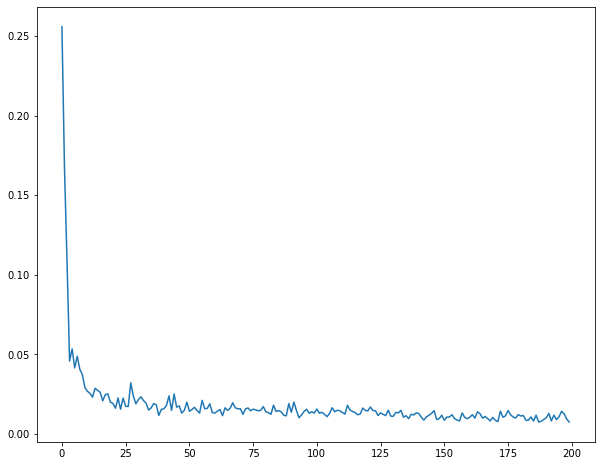

In [101]:
plt.figure(figsize=(10, 8))
plt.plot(history.history['loss'], label='training loss')

In [103]:
pred_price = model.predict(X_test_m)
pred_price = scaler.inverse_transform(pred_price)

train_pred_price = model.predict(X_train_m, )
train_pred_price = scaler.inverse_transform(train_pred_price)

In [104]:
trainScore = np.sqrt(mean_squared_error(scaler.inverse_transform(y_train_m[:,:]), train_pred_price))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(scaler.inverse_transform(y_test_m[:,:]), pred_price))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 4.29 RMSE
Test Score: 4.47 RMSE


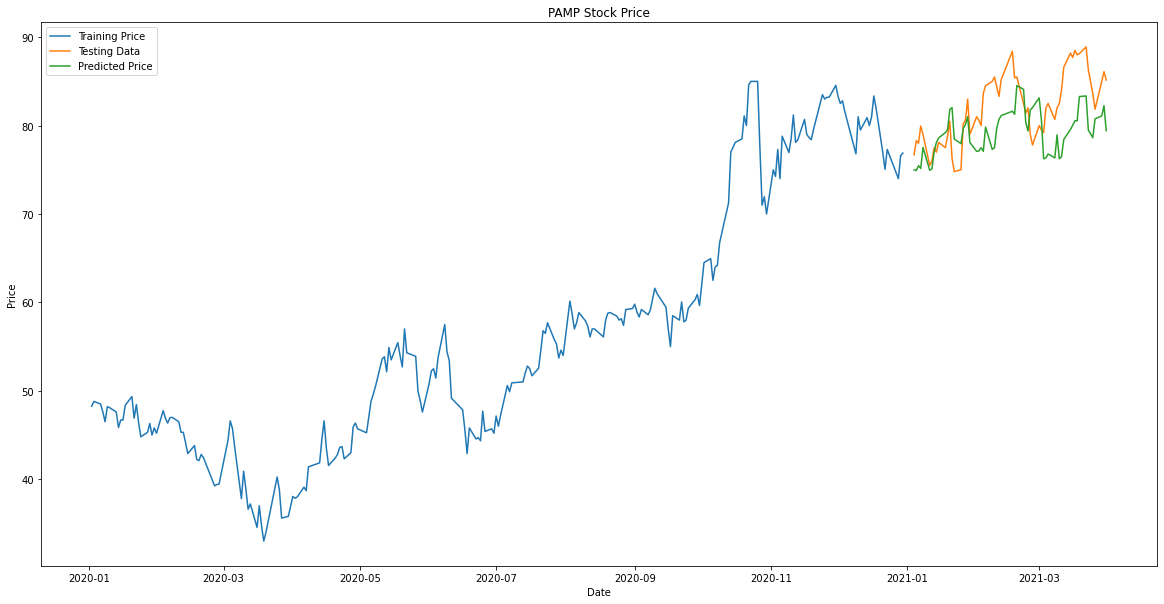

In [105]:
plt.figure(figsize=(20, 10))

plt.plot(training_data['Date'], training_data['Price'], label='Training Price')
plt.plot(testing_data['Date'], testing_data['Price'], label='Testing Data')
plt.plot(testing_data['Date'], pred_price.flatten(), label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('PAMP Stock Price')
plt.legend()
plt.show()